### Modelling maritime traffic on the Baltic Sea using a simple and more elaborate ship maneuvaribility

In [1]:
from pygradu import gridify
import shapely.geometry
import pandas as pd
import numpy as np
import importlib

grid = gridify.area_to_grid(side_length=5000)

Original NE: POINT (134 40)
Original SW: POINT (123 32)
Transformed NE: (798015.8733194428, 745576.647904759)
Transformed SW: (-178108.15701596113, -158644.45983528974)
col_count 195
row_count 180
grid_size 35100


/home/kura8165/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/kura8165/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


plt.rcParams.update({'font.size': 30})
def visualize_graph(graph, grid):
    nodes = graph.original.values
    lats = []
    lons = []
    for node in nodes:
        latlon = grid.extract_coords_lat_lon(node)
        lats.append(latlon[0])
        lons.append(latlon[1])

    f = plt.figure(figsize=[50,50])
    m = Basemap(llcrnrlon = min(lons),llcrnrlat = min(lats), urcrnrlon = max(lons),
               urcrnrlat = max(lats),
               resolution='l')
    m.shadedrelief()

    plt.plot(lons, lats, 'o', c='red', alpha=0.03, markersize=10)

    plt.show()
    
def visualize_two_graphs(graph_bottom, graph_top, grid):
    nodes = graph_bottom.original.drop_duplicates().values
    lats = []
    lons = []
    for node in nodes:
        latlon = grid.extract_coords_lat_lon(node)
        lats.append(latlon[0])
        lons.append(latlon[1])


    nodes = graph_top.original.values
    lats2 = []
    lons2 = []
    for node in nodes:
        latlon = grid.extract_coords_lat_lon(node)
        lats2.append(latlon[0])
        lons2.append(latlon[1])

    f = plt.figure(figsize=[52,52])
    m = Basemap(llcrnrlon = min(lons),llcrnrlat = min(lats), urcrnrlon = max(lons),
               urcrnrlat = max(lats),
               resolution='l')
    m.shadedrelief()

    plt.plot(lons, lats, 'o', c='blue', alpha=1, markersize=10)
    plt.plot(lons2, lats2, 'o', c='red', alpha=0.02, markersize=10)

    plt.show()
    


def visualize_graph(graph, grid):
    nodes = graph.original.drop_duplicates().values
    lats = []
    lons = []
    for node in nodes:
        latlon = grid.extract_coords_lat_lon(node)
        lats.append(latlon[0])
        lons.append(latlon[1])
    print(min(lats))
    print(min(lons))
    f = plt.figure(figsize=[50,50])
    m = Basemap(llcrnrlon = min(lons),llcrnrlat = min(lats), urcrnrlon = max(lons),
               urcrnrlat = max(lats),
               resolution='l')
    m.shadedrelief()

    plt.plot(lons, lats, 'o', c='red', alpha=1, markersize=10)

    plt.show()
    
    
    
    
def visualize_graph_connections(graph, grid):
    rows = graph.drop_duplicates().values
    lats = []
    lons = []
    f = plt.figure(figsize=[60,60])
    for row in rows:
        original_latlon = grid.extract_coords_lat_lon(row[0])
        connected_latlon = grid.extract_coords_lat_lon(row[1])
        lats = [original_latlon[0], connected_latlon[0]]
        lons = [original_latlon[1], connected_latlon[1]]

        plt.plot(lons, lats, alpha=1, markersize=10, linewidth=2, c=np.random.rand(3,))


    m = Basemap(llcrnrlon = min(lons),llcrnrlat = min(lats), urcrnrlon = max(lons),
               urcrnrlat = max(lats),
               resolution='l')
    
    
    m.shadedrelief()

    plt.show()

In [3]:
# Import dataset

ais = pd.read_csv('data/datasets/ko_ais_test.csv', index_col=0, parse_dates = ['timestam'])
ais = ais.sort_values(by=['mmsi', 'timestam'])
ais.head()

/tmp/ipykernel_18845/2547822892.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  ais = pd.read_csv('data/datasets/ko_ais_test.csv', index_col=0, parse_dates = ['timestam'])


mmsi            timestam        lat         lon  speed  course  \
2486      0 2019-09-01 00:00:10  33.962062  126.818543    4.5   271.7   
4218      0 2019-09-01 00:00:18  33.962068  126.818342    4.5   272.2   
6827      0 2019-09-01 00:00:29  33.962082  126.818090    4.5   280.8   
9349      0 2019-09-01 00:00:40  33.962108  126.817797    4.4   281.1   
11486     0 2019-09-01 00:00:50  33.962140  126.817550    4.4   275.2   

       heading  turnrate  breath vessel_type  vessel_max_speed  draft  power  \
2486       278         0     6.0          32                16    0.3  10000   
4218       279         0     6.0          32                16    0.3  10000   
6827       281         0     6.0          32                16    0.3  10000   
9349       284         0     6.0          52                16    0.0  10000   
11486      285         0     6.0          52                16    0.0  10000   

         dwt iceclass  
2486   203.0       IA  
4218   203.0       IA  
6827   203.0       IA  
9349   114.0       IA  
11486  114.0       IA

In [4]:
ais.columns=ais.columns.str.replace('timestam', 'timestamp')
ais

mmsi           timestamp        lat         lon  speed  course  \
2486              0 2019-09-01 00:00:10  33.962062  126.818543    4.5   271.7   
4218              0 2019-09-01 00:00:18  33.962068  126.818342    4.5   272.2   
6827              0 2019-09-01 00:00:29  33.962082  126.818090    4.5   280.8   
9349              0 2019-09-01 00:00:40  33.962108  126.817797    4.4   281.1   
11486             0 2019-09-01 00:00:50  33.962140  126.817550    4.4   275.2   
...             ...                 ...        ...         ...    ...     ...   
21597851  999999999 2019-09-01 23:34:50  35.444632  129.365895    0.0   128.0   
21748281  999999999 2019-09-01 23:45:50  35.444642  129.365903    0.0   109.1   
21806599  999999999 2019-09-01 23:50:06  33.521342  126.360397    1.7   252.2   
21888703  999999999 2019-09-01 23:56:07  33.520707  126.357025    1.9   242.2   
21929797  999999999 2019-09-01 23:59:07  33.520327  126.355413    1.5   251.2   

          heading  turnrate  breath vessel_type  vessel_max_speed  draft  \
2486          278         0     6.0          32                16    0.3   
4218          279         0     6.0          32                16    0.3   
6827          281         0     6.0          32                16    0.3   
9349          284         0     6.0          52                16    0.0   
11486         285         0     6.0          52                16    0.0   
...           ...       ...     ...         ...               ...    ...   
21597851      132         0     NaN         NaN                16    NaN   
21748281      131         0     NaN         NaN                16    NaN   
21806599      511         0     NaN         NaN                16    NaN   
21888703      511         0     NaN         NaN                16    NaN   
21929797      511         0     NaN         NaN                16    NaN   

          power    dwt iceclass  
2486      10000  203.0       IA  
4218      10000  203.0       IA  
6827      10000  203.0       IA  
9349      10000  114.0       IA  
11486     10000  114.0       IA  
...         ...    ...      ...  
21597851  10000    NaN       IA  
21748281  10000    NaN       IA  
21806599  10000    NaN       IA  
21888703  10000    NaN       IA  
21929797  10000    NaN       IA  

[21941694 rows x 15 columns]

In [5]:
# Remove unnecessary columns
%time ais_subset = ais[['timestamp', 'mmsi', 'lat', 'lon']]
len(ais_subset)

CPU times: user 111 ms, sys: 32.2 ms, total: 143 ms
Wall time: 143 ms


21941694

In [6]:
%time ais_subset['grid_point'] = ais_subset.apply(lambda row: grid.get_grid_point(row.lat, row.lon), axis=1)

CPU times: user 3d 2h 1min 27s, sys: 3h 16min 46s, total: 3d 5h 18min 14s
Wall time: 3d 5h 18min 25s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
%time ais_subset['node'] = ais_subset.apply(lambda row: grid.get_grid_position(row), axis=1)

CPU times: user 4min 18s, sys: 4.83 s, total: 4min 23s
Wall time: 4min 20s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
ais_subset = ais_subset[['timestamp', 'mmsi', 'lat', 'lon', 'node']]
ais_subset.head()

timestamp  mmsi        lat         lon  node
2486  2019-09-01 00:00:10     0  33.962062  126.818543  7451
4218  2019-09-01 00:00:18     0  33.962068  126.818342  7451
6827  2019-09-01 00:00:29     0  33.962082  126.818090  7451
9349  2019-09-01 00:00:40     0  33.962108  126.817797  7451
11486 2019-09-01 00:00:50     0  33.962140  126.817550  7451

### Model movement options using adjacent model

In [9]:
importlib.reload(gridify)

%time traffic_graph_adjacent = gridify.create_graph_from_ais_adjacent(ais_subset)
graph_cols = ['original', 'connected']
traffic_graph_adjacent = pd.DataFrame(traffic_graph_adjacent, columns=graph_cols)
traffic_graph_adjacent.head(5)

CPU times: user 9min 22s, sys: 1.49 s, total: 9min 24s
Wall time: 9min 24s


original  connected
0      7451      16857
1     16857       7451
2      7451      16857
3     16857       7451
4      7451      16857

32.65984904592314
124.47251925106609


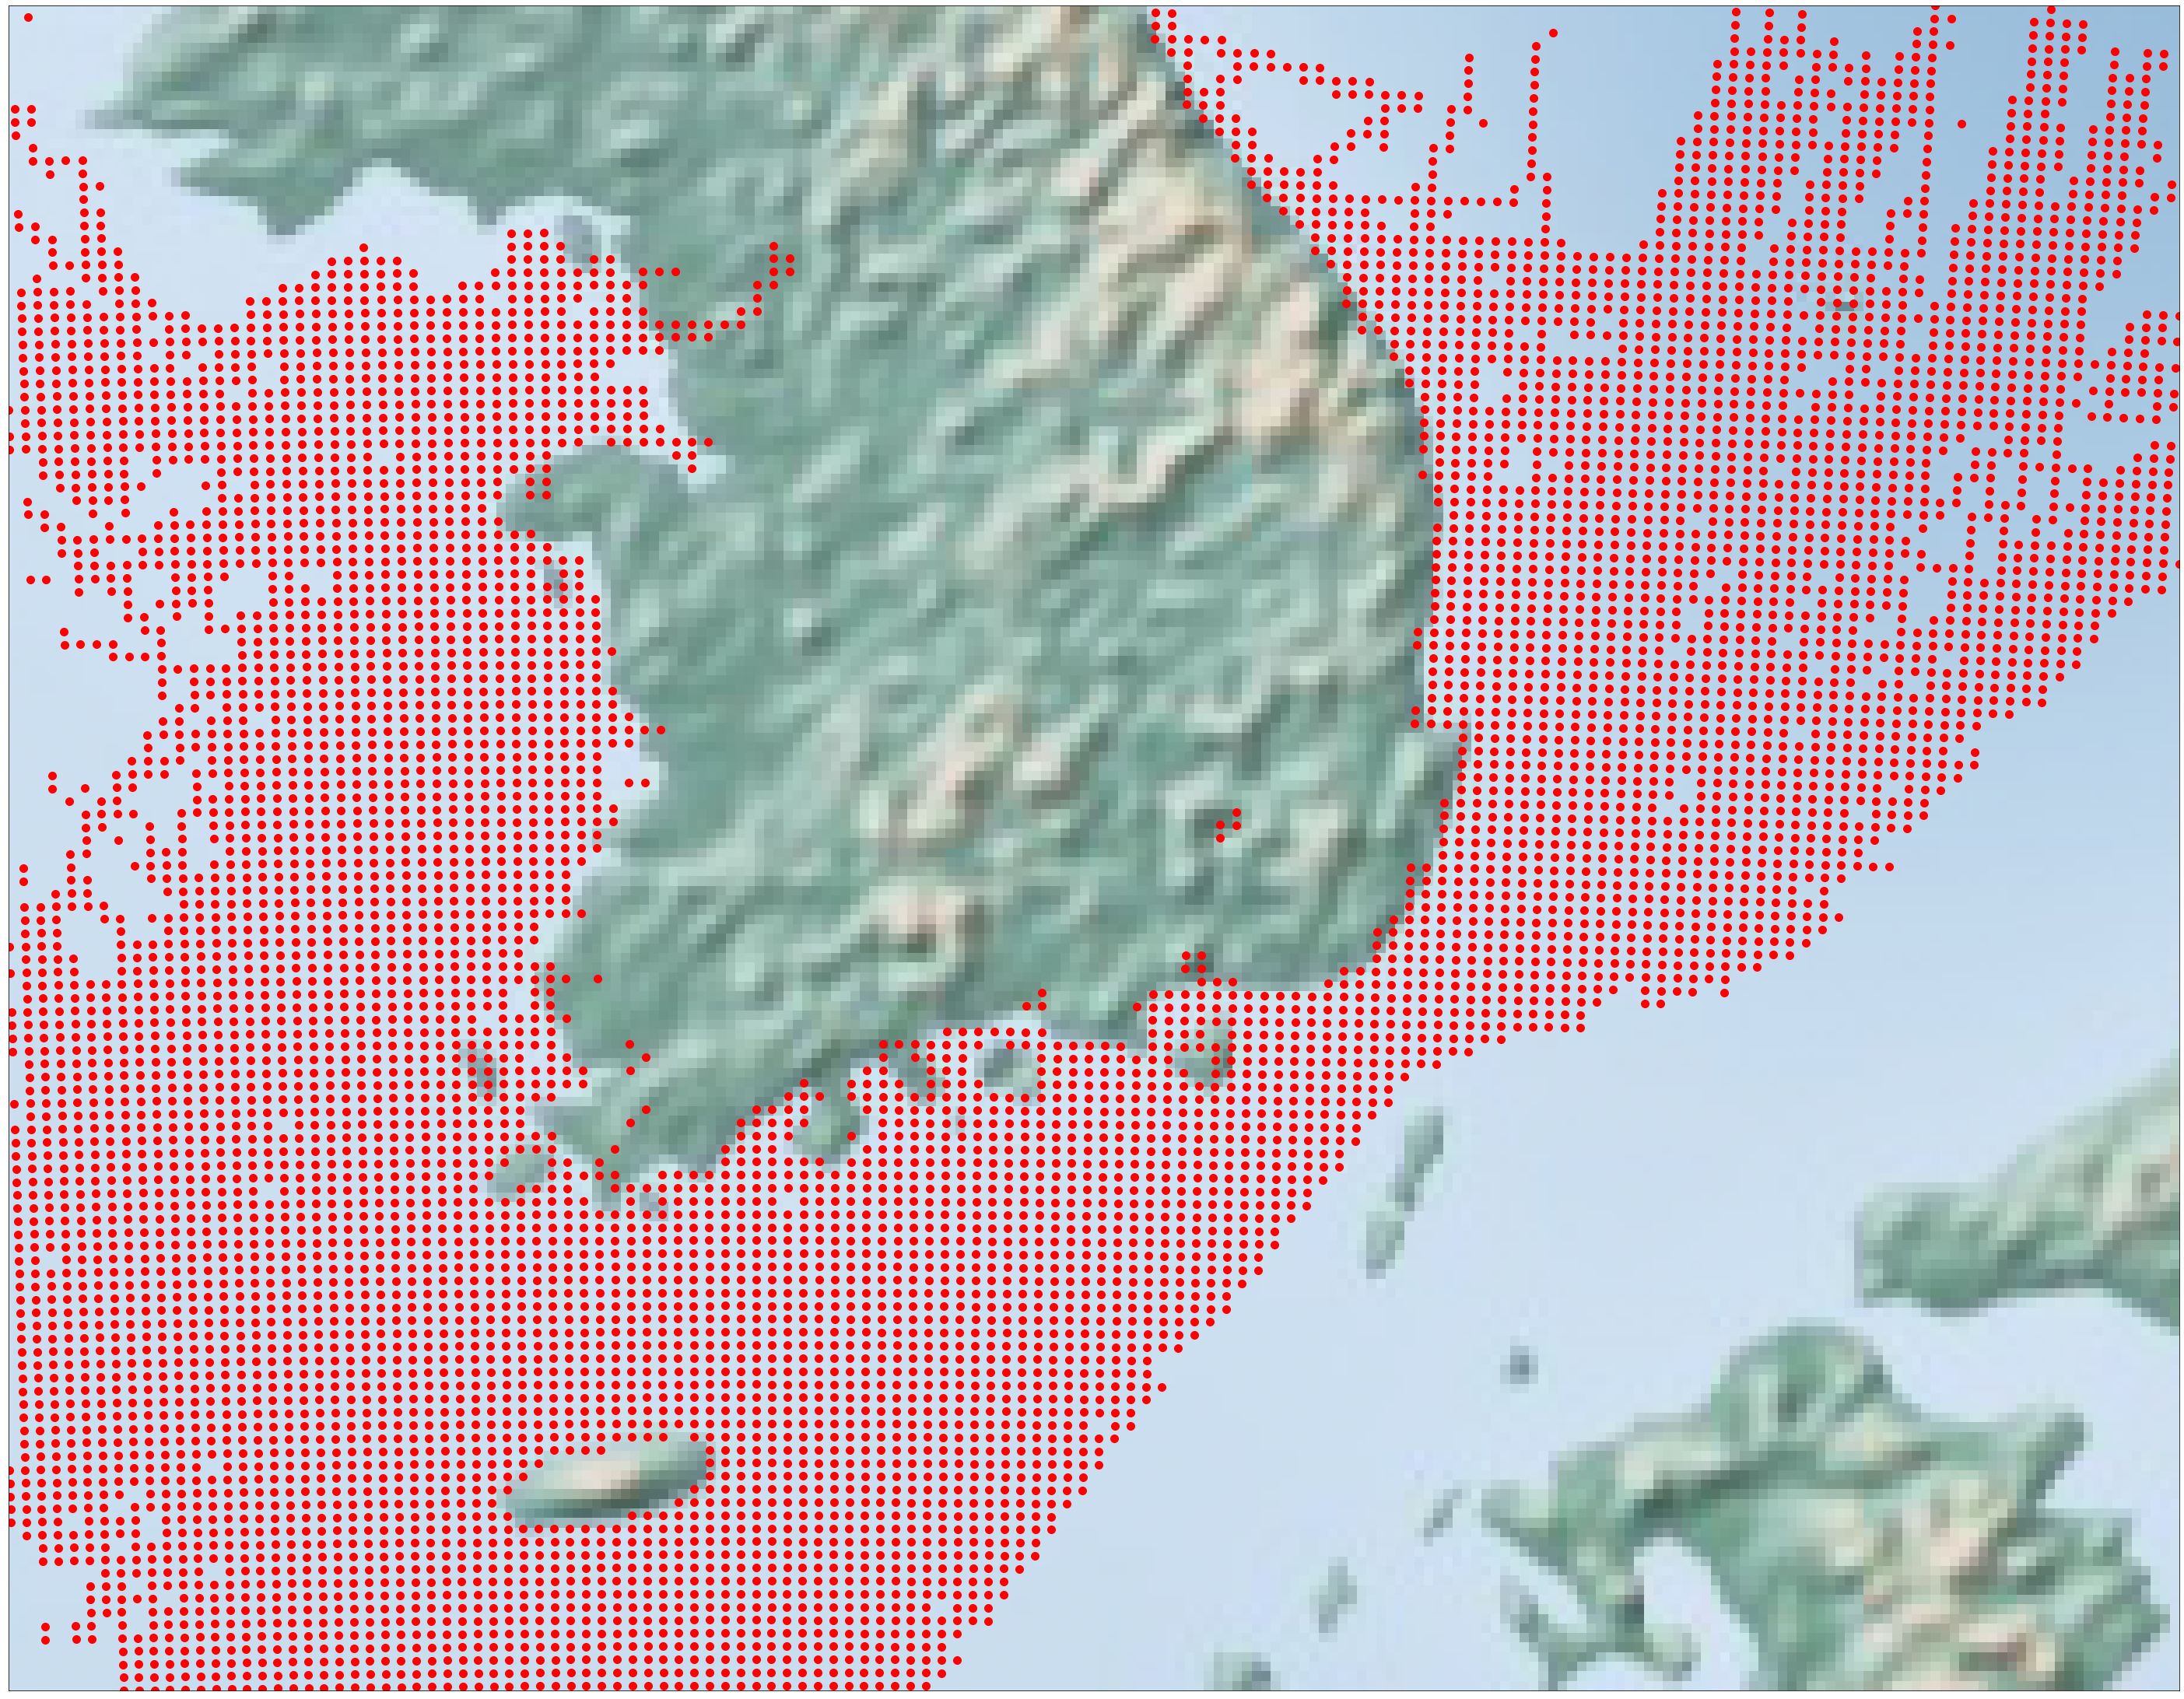

In [10]:
visualize_graph(traffic_graph_adjacent.drop_duplicates(), grid)

### Remove impossible connections

32.65984904592314
124.47251925106609


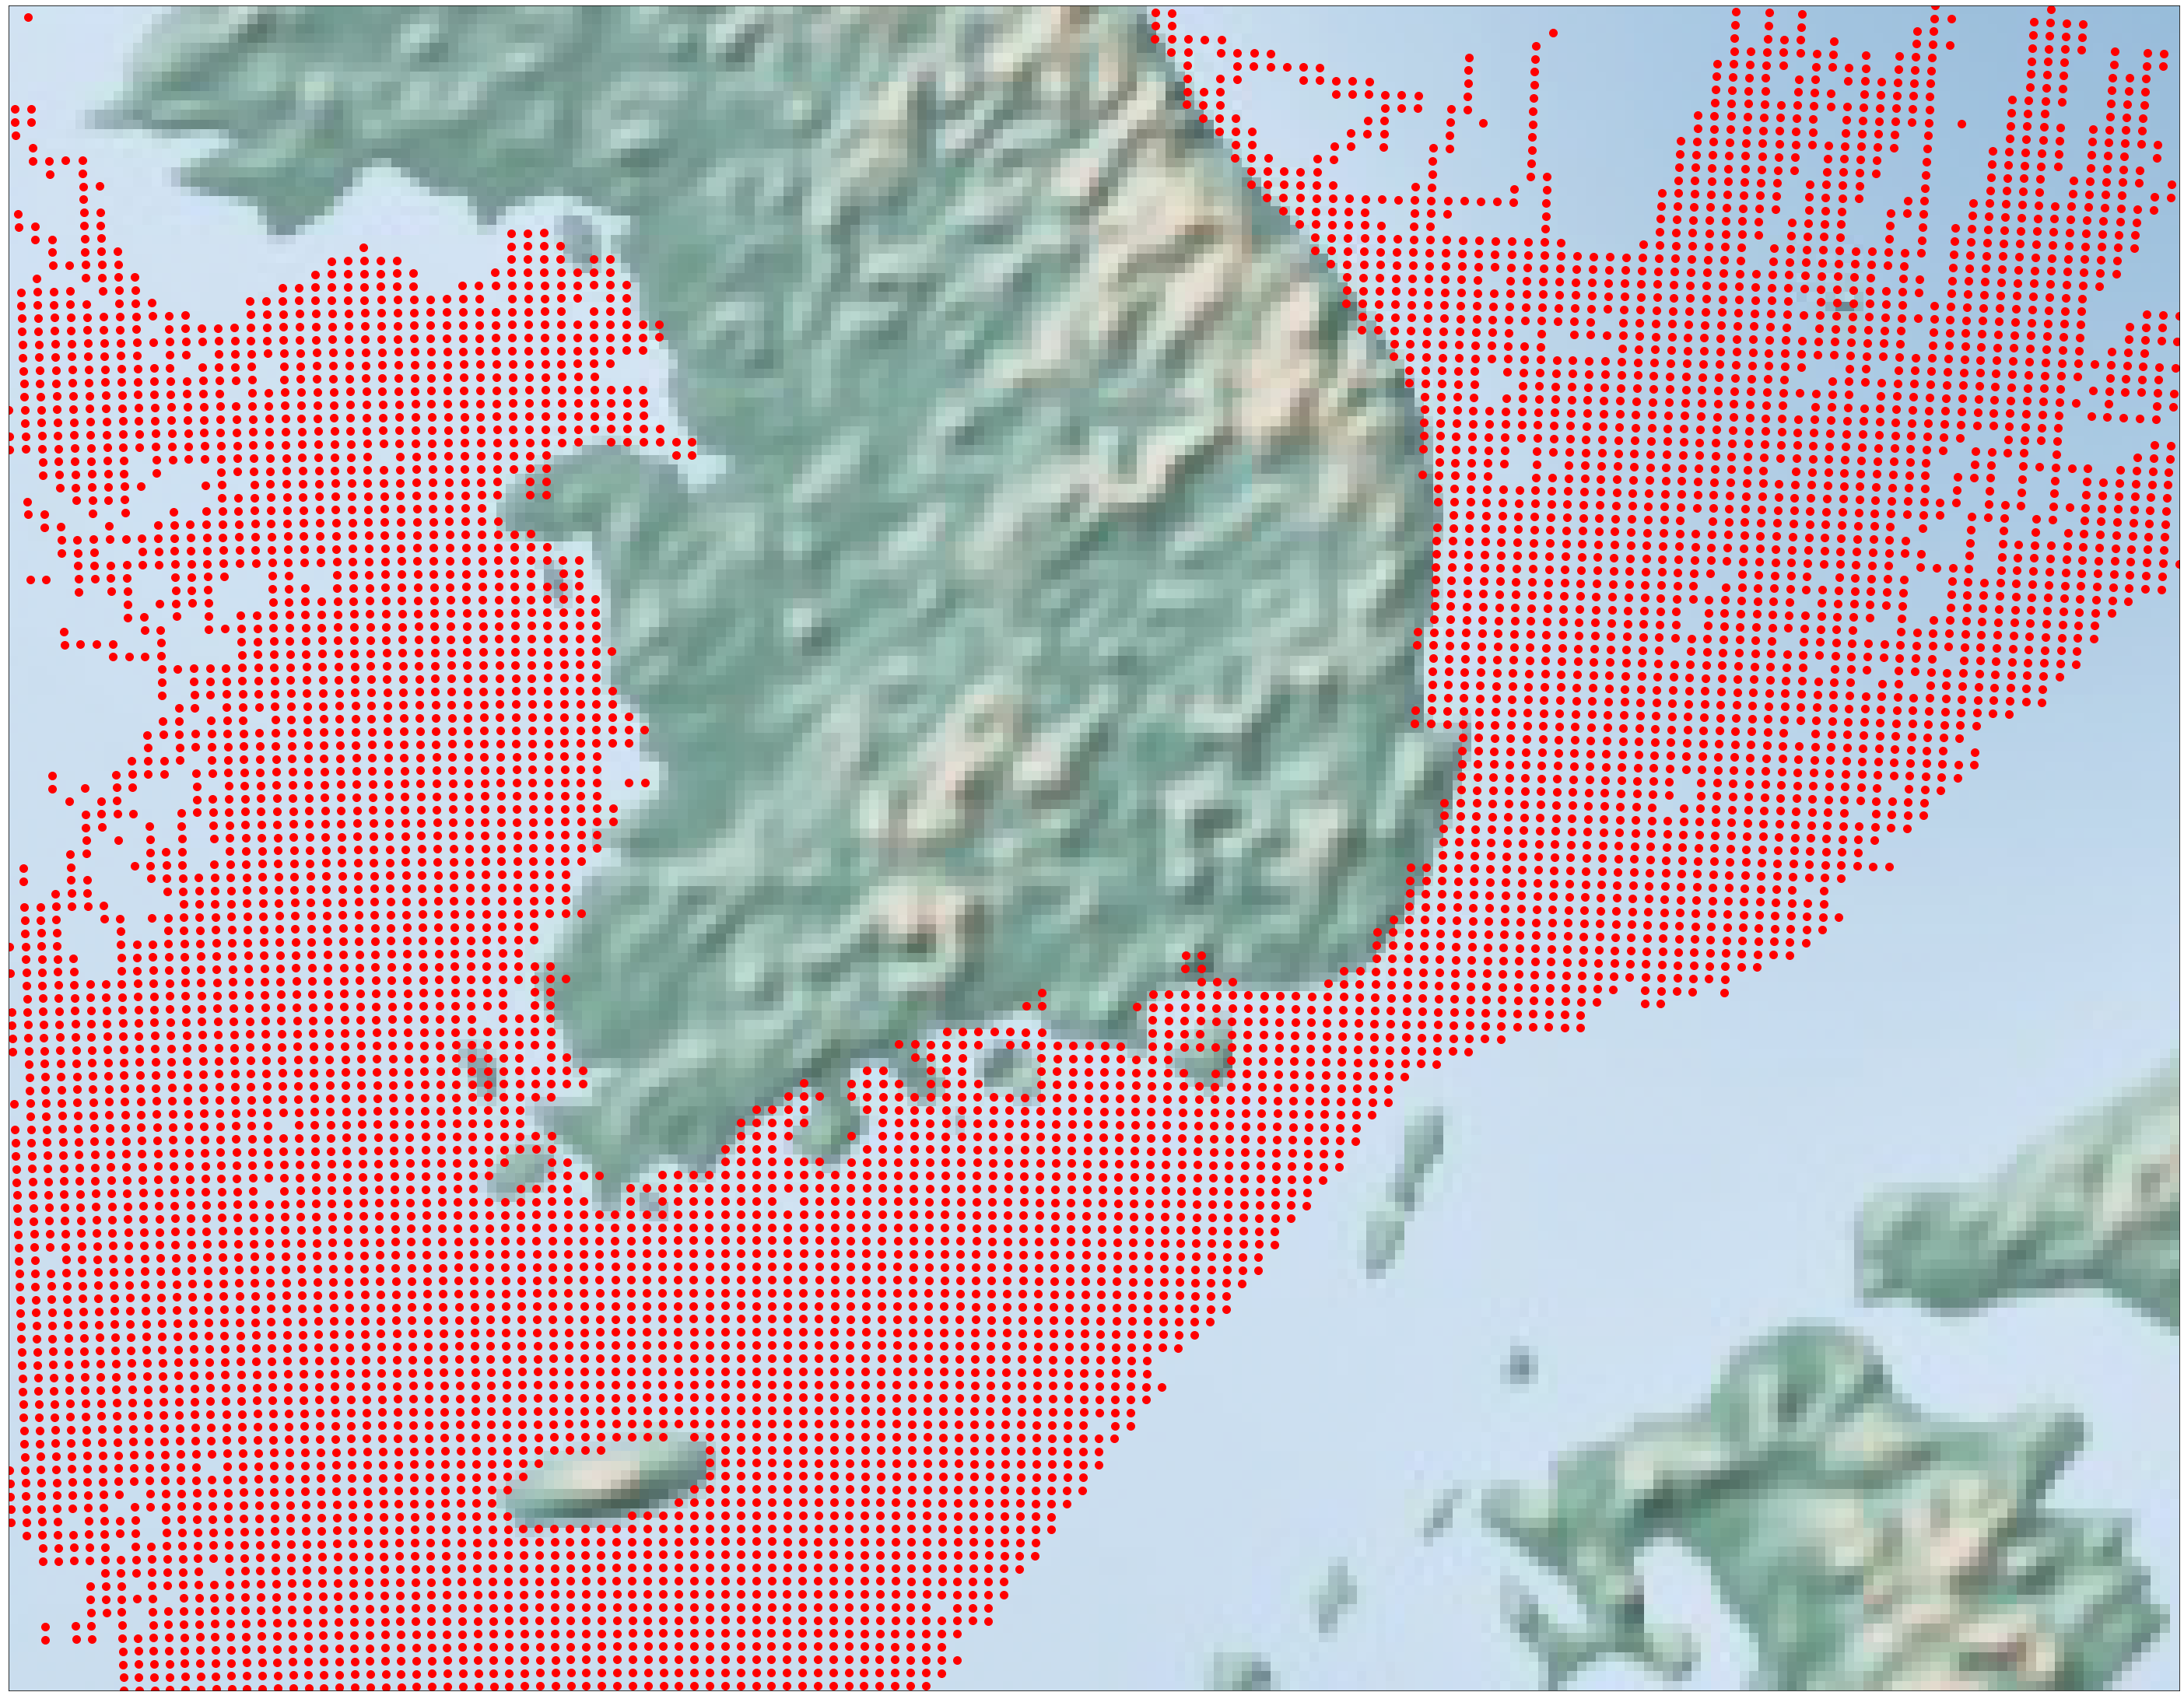

In [11]:
sea_graph = pd.read_csv('data/models/sea_5km_model.csv')

originals = set(sea_graph.original.drop_duplicates().values)
traffic_graph_adjacent = traffic_graph_adjacent[traffic_graph_adjacent.original.isin(originals) & traffic_graph_adjacent.connected.isin(originals)]
visualize_graph(traffic_graph_adjacent, grid)

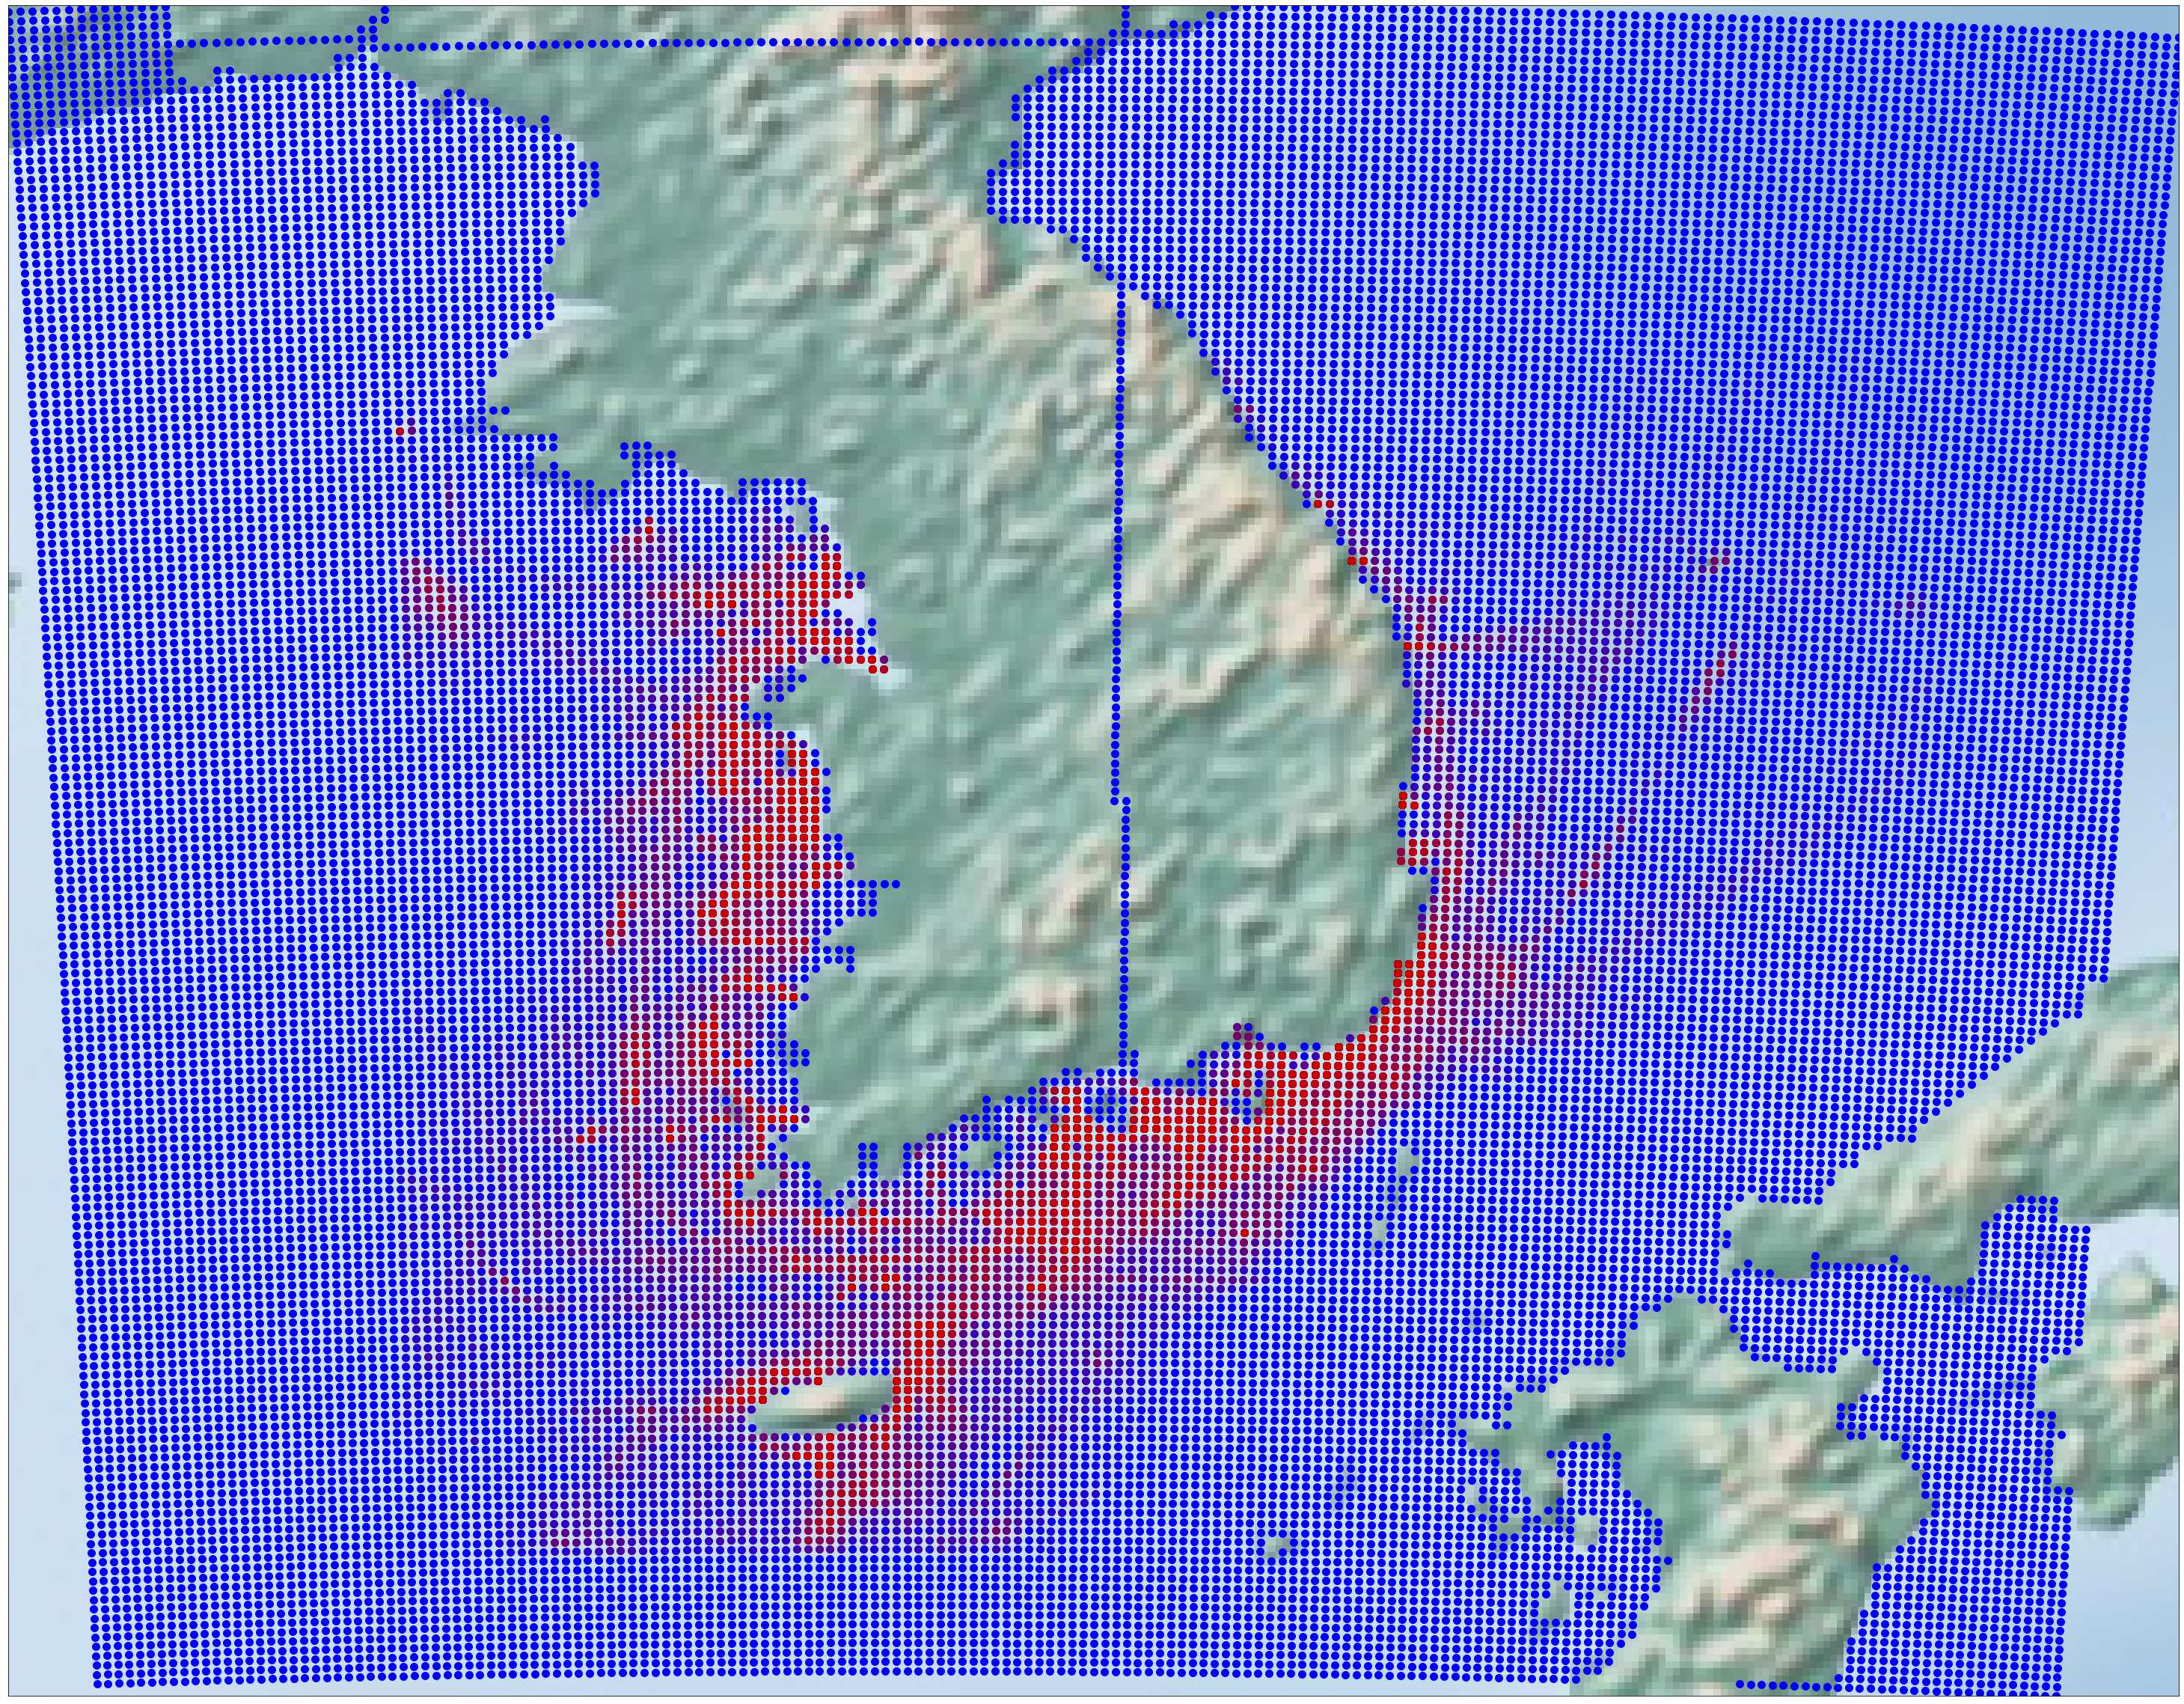

In [12]:
visualize_two_graphs(sea_graph, traffic_graph_adjacent, grid)

In [13]:
traffic_graph_adjacent.to_csv("data/models/traffic_5km_model2.csv")

In [14]:
nodes = traffic_graph_adjacent.original.values
traffic_model_lats = []
traffic_model_lons = []
    
count = 0
for node in nodes:
    if count % 10000 == 0:
        print("plot node to %d ~ %d"%(count, len(nodes)))
    latlon = grid.extract_coords_lat_lon(node)
    traffic_model_lats.append(latlon[0])
    traffic_model_lons.append(latlon[1])
    count += 1

plot node to 0 ~ 221885
plot node to 10000 ~ 221885
plot node to 20000 ~ 221885
plot node to 30000 ~ 221885
plot node to 40000 ~ 221885
plot node to 50000 ~ 221885
plot node to 60000 ~ 221885
plot node to 70000 ~ 221885
plot node to 80000 ~ 221885
plot node to 90000 ~ 221885
plot node to 100000 ~ 221885
plot node to 110000 ~ 221885
plot node to 120000 ~ 221885
plot node to 130000 ~ 221885
plot node to 140000 ~ 221885
plot node to 150000 ~ 221885
plot node to 160000 ~ 221885
plot node to 170000 ~ 221885
plot node to 180000 ~ 221885
plot node to 190000 ~ 221885
plot node to 200000 ~ 221885
plot node to 210000 ~ 221885
plot node to 220000 ~ 221885


In [16]:
data = {
    'traffic_model_lats' : traffic_model_lats,
    'traffic_model_lons' : traffic_model_lons
}

f = pd.DataFrame(data)
f.to_csv("data/models/traffic_5km_model2_to_lats_lons.csv")